In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

df = pd.read_csv('C:/Users/chlal/Desktop/POC시연자료/상관분석_혈압나이성별온도.csv')

In [109]:
df['sex'] = df['sex'].map({'F':0, 'M':1})
df=df.dropna(axis=0)
df=df.astype('int')

In [113]:
target = df.iloc[:, [0]]
target

,height
0,133
1,136
2,139
3,139
4,140
...,...
2225,188
2226,188
2227,188
2228,189


In [111]:
indepen = df.iloc[:, [1]]
indepen

,age
0,98
1,82
2,67
3,95
4,84
...,...
2225,45
2226,35
2227,22
2228,28


In [88]:
x = df[['age', 'sex', 'weight', 'diastolic', 'systolic', 'temperature', 'pulse']]
y = df[['height']]

In [114]:
x_train, x_test,y_train, y_test =train_test_split(x,y,train_size = 0.8,
                                                  test_size = 0.2,random_state=42)

In [115]:
# 모델 적용
ridge=Ridge()
ridge.fit(x_train,y_train)
print(ridge.score(x_train,y_train))
print(ridge.score(x_test, y_test))

0.6504860170883007
0.653257838258368


In [116]:
# 모델을 사용해서 만든 예측값
y_predict = ridge.predict(x_test)

In [117]:
# 실제 키 값
y_test=y_test.reset_index(drop=True)
y_test.columns = ['x']

In [118]:
result_all=pd.concat([y_test,pd.DataFrame(y_predict, columns=['y'])], axis=1)
result_all

,x,y
0,168,170.393542
1,168,165.262647
2,158,161.473601
3,169,170.388350
4,165,168.246794
...,...,...
438,175,172.039251
439,163,159.992088
440,154,160.266414
441,167,172.746787


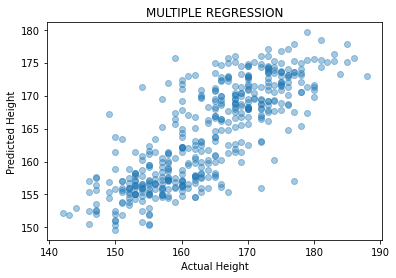

In [119]:
# 위 예측값과 실제 키 값을 시각화
import matplotlib.pyplot as plt
plt.scatter(result_all.x, result_all.y, alpha=0.4)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.title("MULTIPLE REGRESSION")
plt.show()

In [120]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

In [121]:
alpha_list=[0.001,0.01,0.1,10,100]
for alpha in alpha_list:
    ridge=Ridge(alpha=alpha)
    ridge.fit(x_train,y_train)
    train_score.append(ridge.score(x_train, y_train))
    test_score.append(ridge.score(x_test, y_test))

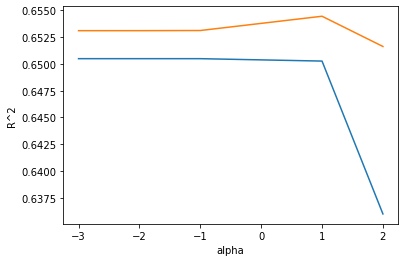

In [122]:
import numpy as np
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [98]:
col_name1=['train_score_alpha']
train_score_alpha=pd.DataFrame(train_score, columns=col_name1)

col_name2=['test_score_alpha']
test_score_alpha=pd.DataFrame(test_score, columns=col_name2)

In [99]:
ridge=Ridge(alpha=10)
ridge.fit(x_train,y_train)
print(ridge.score(x_train,y_train))
print(ridge.score(x_test, y_test))

0.6485769977793219
0.6567548051080523


In [100]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [101]:
ridge_r2=r2_score(y_test,y_predict)
ridge_mse=mean_squared_error(y_test,y_predict)
ridge_mae=mean_absolute_error(y_test,y_predict)

In [102]:
Ridge_r2 = [str(ridge_r2)]
Ridge_r2 = pd.DataFrame(Ridge_r2)
Ridge_r2.rename(columns={Ridge_r2.columns[0]: "R2_score"}, inplace=True)

Ridge_mse = [str(ridge_mse)]
Ridge_mse = pd.DataFrame(Ridge_mse)
Ridge_mse.rename(columns={Ridge_mse.columns[0]: "MSE"}, inplace=True)

Ridge_mae = [str(ridge_mae)]
Ridge_mae= pd.DataFrame(Ridge_mae)
Ridge_mae.rename(columns={Ridge_mae.columns[0]: "MAE"}, inplace=True)

In [103]:
corr_df = df.corr()
corr_df = corr_df.apply(lambda x: round(x, 2))
corr_df_unstack = corr_df.unstack()

In [104]:
corr_df2=corr_df.reset_index()

In [105]:
corr_df2

,index,height,age,sex,weight,diastolic,systolic,temperature,pulse
0,height,1.00,-0.39,0.71,0.51,0.05,0.14,-0.04,0.01
1,age,-0.39,1.00,-0.08,-0.16,-0.02,0.10,-0.04,-0.15
2,sex,0.71,-0.08,1.00,0.42,0.07,0.22,-0.07,-0.02
3,weight,0.51,-0.16,0.42,1.00,0.12,0.29,-0.02,0.01
4,diastolic,0.05,-0.02,0.07,0.12,1.00,0.39,-0.00,0.07
5,systolic,0.14,0.10,0.22,0.29,0.39,1.00,0.01,0.11
6,temperature,-0.04,-0.04,-0.07,-0.02,-0.00,0.01,1.00,0.07
7,pulse,0.01,-0.15,-0.02,0.01,0.07,0.11,0.07,1.00


In [106]:
result_all = pd.concat([result_all,corr_df2 ], axis=1)

result_all = pd.concat([result_all,train_score_alpha ], axis=1)
result_all = pd.concat([result_all,test_score_alpha ], axis=1)

result_all = pd.concat([result_all,Ridge_r2 ], axis=1)
result_all = pd.concat([result_all,Ridge_mse ], axis=1)
result_all = pd.concat([result_all,Ridge_mae ], axis=1)

In [107]:
result_all

,x,y,index,height,age,sex,weight,diastolic,systolic,temperature,pulse,train_score_alpha,test_score_alpha,R2_score,MSE,MAE
0,176,168.990536,height,1.00,-0.39,0.71,0.51,0.05,0.14,-0.04,0.01,0.648795,0.656989,0.6569856917009034,28.166276237000954,4.242296631152954
1,163,165.677571,age,-0.39,1.00,-0.08,-0.16,-0.02,0.10,-0.04,-0.15,0.648795,0.656989,NaN,NaN,NaN
2,163,155.165811,sex,0.71,-0.08,1.00,0.42,0.07,0.22,-0.07,-0.02,0.648795,0.656989,NaN,NaN,NaN
3,168,166.367059,weight,0.51,-0.16,0.42,1.00,0.12,0.29,-0.02,0.01,0.648577,0.656755,NaN,NaN,NaN
4,155,157.244309,diastolic,0.05,-0.02,0.07,0.12,1.00,0.39,-0.00,0.07,0.634738,0.642259,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,170,172.037126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439,163,161.342523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,160,167.437404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441,147,156.851477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
